<a href="https://colab.research.google.com/github/unknown-jun/NLP_study/blob/main/B01_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B8%B0%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 파이토치 기초 문법

## 1.1. 텐서 다루기

### a. 텐서 생성 및 변환

In [ ]:
import torch
print(torch.tensor([[1,2], [3,4]])) # 2차원 형태의 텐서 생성
print(torch.tensor([[1,2], [3,4]], device="cuda:0"))      # GPU에 텐서 생성
print(torch.tensor([[1,2], [3,4]], dtype=torch.float64))  # dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [ ]:
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())  # 텐서를 ndarray로 변환

temp = torch.tensor([[1,2],[3,4]], device='cuda:0')
print(temp.to('cpu').numpy())  # GPU 상의 텐서를 CPU의 텐서로 변환한 후 ndarray로 변환

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


### b. 텐서의 인덱스 조작
- torch.FloatTensor: 32비트의 부동 소수점
- torch.DoubleTensor: 64비트의 부동 소수점
- torch.LongTensor: 64비트의 부호가 있는 정수

In [ ]:
temp = torch.FloatTensor([1,2,3,4,5,6,7])  # 파이토치로 1차원 벡터 생성
print(temp[0], temp[1], temp[-1]) # 인덱스로 겁근
print(temp[2:5], temp[4:-1])      # 슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
tensor([3., 4., 5.]) tensor([5., 6.])


### c. 텐서의 연산 및 차원 조작

In [ ]:
v = torch.tensor([1,2,3])  # 길이가 3인 벡터 생성
w = torch.tensor([3,4,6])

print(w-v)

tensor([2, 2, 3])


In [ ]:
temp = torch.tensor([[1,2],
                     [3,4]])
print(temp.shape)
print(temp.view(4,1))  # 2x2 행렬을 4x1로 변환
print(temp.view(-1))   # 2x2 행렬을 1차원 벡터로 변형
print(temp.view(1,-1)) # -1은 (1, ?)와 같은 의미로 다츤 차원으로부터 해당 값을 유추하겠다는 것
                       # temp의 원소 개수(2x2=4)를 유지한 채 (1, ?)의 형태를 만족해야 하므로
                       # (1,4)가 됩니다.
print(temp.view(-1, 1))

torch.Size([2, 2])
tensor([[1],
        [2],
        [3],
        [4]])
tensor([1, 2, 3, 4])
tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])


## 1.2 데이터 준비

### a. 커스텀 데이터셋을 만들어서 사용
- 데이터를 한번에 메모리에 불러와서 훈련시키면 시간과 비용 측면에서 효율적이지 않다.
- 따라서 데이터를 한 번에 다 부르지 않고 조금씩 나누어 불러서 사용하는 방식이 커스텀 데이터셋(custom dataset)이라고 한다.

In [ ]:
# CustomDataset을 구현하기 위한 형태
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self):     # 필요한 변수를 선언하고, 데이터셋의 전처리를 해주는 함수
    pass
  def __len__(self):      # 데이터셋의 길이, 즉, 총 샘플의 수를 가져오는 함수
    pass
  def __getitem__(self):    # 데이터셋에서 특정 데이터를 가져오는 함수
                          # index번째 데이터를 반환하는 함수이며, 이때 반환되는 값은 텐서의 형태를 취해야 한다.
    pass

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, csv_file):
    ''' csv_file 파라미터를 통해 데이터셋을 불러옴'''
    self.label = pd.read_csv(csv_file)

  def __len__(self):
    ''' 전체 데이터셋의 크기(size)를 반환'''
    return len(self.label)

  def __getitem__(self, idx):
    ''' 전체 x와 y 데이터 중에 해당 idx번째의 데이터를 가져옴'''
    sample = torch.tensor(self.label.iloc[idx, 0:-2]).int()
    label = torch.tensor(self.label.iloc[idx, -1]).int()
    return sample, label

tensor_dataset = CustomDataset('/content/sample_data/california_housing_train.csv')
# 데이터셋으로 파일을 불러옴
dataset = DataLoader(tensor_dataset, batch_size=4, shuffle=True)
# 데이터셋을 torch.utils.data.DataLoader에 파라미터로 전달

**torch.utils.data.DataLoader**  
- DataLoader 객체는 학습에 사용될 데이터 전체를 보관했다가 모델 학습을 할 때 배치 크기만큼 데이터를 꺼내서 사용함.  

- 이때 주의할 것은 데이터를 미리 잘라 놓는 것이 아니라 내부적으로 iterator에 포함된 index를 이용하여 배치 크기만큼 데이터를 반환한다는 점


### b. 파이토치에서 제공하는 데이터셋 사용

In [ ]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.5, ), (1.0,))
])   # 평균이 0.5, 표준편차가 1.0이 되도록 데이터의 분포(normalize)를 조정

In [ ]:
from torchvision.datasets import MNIST
import requests

download_root = '../chap02/data/MNIST_DATASET'  # 내려받을 경로 지정

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)  # 훈련(training) 데이터셋
vaild_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True) # 검증(validation) 데이터셋
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)  # 테스트(test) 데이터셋

Using downloaded and verified file: ../chap02/data/MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



## 1.3 모델의 정의
파이토치에서 모델을 정의하기 위해서는 모듈(module)을 상속한 클래스를 사용한다.
- 계층(layer): 모듈 또는 모듈을 구성하는 한 개의 계층으로 합성곱층(convolutional layer), 선형 계층(linear layer) 등이 있다.
- 모듈(module): 한 개 이상의 계층이 모여서 구성된 것으로, 모듈이 모여 새로운 모듈을 만들 수도있다.
- 모델(model): 최종적으로 원하는 네트워크로, 한개의 모듈이 모델이 될 수도 있다.

### a. 단순 신경망을 정의하는 방법
- nn.Module을 상속받지 않은 매우 간단한 모델을 만들 때 사용한다. 
- 구현이 매우 쉽고 단순하다는 장점

In [ ]:
import torch.nn as nn
model = nn.Linear(in_features=1, out_features=1, bias=True)

### b. `nn.Module()`을 상속하여 정의하는 방법
- 파이토치에서 `nn.Module`을 상속받는 모델은 기본적으로 `__init__()`과 `forward()`함수를 포함한다.
- `__init__()`에서는 모델에서 사용될 모듈(`nn.Linear`, `nn.Conv2d`), 활성화 함수 등을 정의하고, `forward()` 함수에서는 모델에서 실행되어야 하는 연산을 정의함

In [ ]:
class MLP(nn.Module):
  def __init__(self, inputs):
    super(MLP, self).__init__()
    self.layer = nn.Linear(inputs, 1)  # 계층 정의
    self.activation = nn.Sigmoid()     # 활성화 함수 정의

  def forward(self, X):
    X = self.layer(X)
    X = self.activation(X)
    return X

### c. Sequential 신경망을 정의하는 방법
- `nn.Sequential`을 사용하면 `__init__()`에서 사용할 네트워크 모델들을 정의함
- 더불어 `forward()` 함수에서는 모델에서 실행되어야 할 계산을 가독성있는 코드로 작성이 가능
- `Sequential` 객체는 그 안에 포함된 각 모듈을 순차적으로 실행해 줌

In [ ]:
import torch.nn as nn
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)    )
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)    )
    
    self.layer3 = nn.Sequential(
      nn.Linear(in_features=30*5*5, out_features=10, bias=True),
      nn.ReLU(inplace=True) )
    
  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = x.view(x.shape[0], -1)
    x = self.layer3(x)
    return x

model = MLP()   # 모델에 대한 객체 정의

print("Printing children\n-------------------------")
print(list(model.children()))
print("Printing Modules\n-------------------------")
print(list(model.modules()))

Printing children
-------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
Printing Modules
-------------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_feature

### d. 함수로 신경망을 정의하는 방법
- `Sequential`을 이용하는 것과 동일하지만, 함수로 선언할 경우 변수에 저장해 놓은 계층들을 재사용할 수 있는 장점이 있다.
- 하지만 모델이 복잡해지는 단점이 존재
- 복잡한 모델의 경우에는 `nn.Module()`을 상속받아 사용하는 것이 편리함

In [ ]:
def MLP(in_features=1, hidden_features=20, out_features=1):
  hidden = nn.Linear(in_features= in_features, out_features= hidden_features, bias=True)
  activation = nn.ReLU()
  output = nn.Linear(in_features= hidden_features, out_features= out_features, bias=True)
  net = nn.Sequential(hidden, activation, output)
  return net

## 1.4 모델의 파라미터 정의
- 손실 함수(loss function): 학습하는 동안 출력과 실제 값(정답) 사이의 오차를 측정. 즉 $wx+b$를 계산한 값과 실제 값인 y의 오차를 구해서 모델의 정확성을 측정함. 손실 함수로 많이 사용되는 것은 다음과 같다
  - `BCELoss`: 이진분류를 위해서 사용
  - `CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `MSELoss`: 회귀 모델에서 사용
- 옵티마이저(optimizer): 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정함. 옵티마이저의 주요 특성은 다음과 같다.
  - optimizer는 `step()` 메서드를 통해 전달받은 파라미터를 업데이트
  - 모델의 파라미터 별로 다른 기준(ex. 학습률)을 적용시킬 수 있다.
  - `torch.optim.Optimizer(params, defaults)`는 모든 옵티마이저의 기본이 되는 클래스
  - `zero_grad()` 메소드는 옵티마이저에 사용된 파라미터들의 기울기(gradient)를 0으로 만듬
  - `torch.lr_scheduler`는 에포크에 따라 학습률을 조절할 수 있다.
  - 옵티마이저에 사용되는 종류는 다음과같다.
    - `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.SparseAdam`, `optim.Adamax`
    - `optim.ASGD`, `optim.LBFGS`
    - `optim.RMSProp`, `optim.Rprop`, `optim.SGD`

- 학습률 스케줄러(learning rate scheduler): 미리 지정한 횟수의 에포크를 지날 때마다 학습률을 감소(decay)시켜 줌. 학습률 스케줄러를 이용하면 학습 초기에는 빠른 학습을 진행하다가 전역 최소점(global minimum) 근처에 다다르면 학습률을 줄여서 최적점을 찾아갈 수 있도록 해줌. 학습률 스케줄러의 종류는 다음과 같다.
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용하여 그 함수의 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 특정 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소.
  - `optim.lr_scheduler.MultiplicativeLR`: StepLR과 비슷하지만 특정 단계가 아닌 지정된 에프코에만 감마 비율로 감소시킴.
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마(지수함수)만큼 곱함.
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시킴. 따라서 학습률이 커지기도 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되고 있는지 아닌지에 따라 동적으로 학습률을 변화시킬 수 있다.

```
# 모델의 파라미터를 정의하는 예시 코드
from torch.optim import optimizer

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch:0.95 ** epoch)

for epoch in range(1, 100+1):     # 에포크 수만큼 데이터를 반복해서 처리
  for x, y in dataloader:         # 배치 크기만큼 데이터를 가져와서 학습 진행
    optimizer.zero_grad()
loss_fn(model(x), y).backward()

optimizer.step()
scheduler.step()
```

## 1.5 모델 훈련
- 모델 훈련 시 가장 먼저 필요한 절차가 `optimizer.zero_grad()` 메소드를 이용하여 기울기를 초기화하는 것
- 파이토치는 기울기 값을 계산하기 위해 `loss.backward()`메소드를 이용하는데, 이를 사용하면 새로운 기울기 값이 이전 기울기 값에 누적하여 계산됨
- 이 과정은 누적 계산이 필요하지 않은 모델에 대해서는 불필요함
- 이런 경우에는 입력 값을 모델에 적용하기 전에 `optimizer.zero_grad()`메소드를 호출하여 미분 값(기울기를 구하는 과정에서 미분을 사용)이 누적되지 않게 초기화해 주어야 함

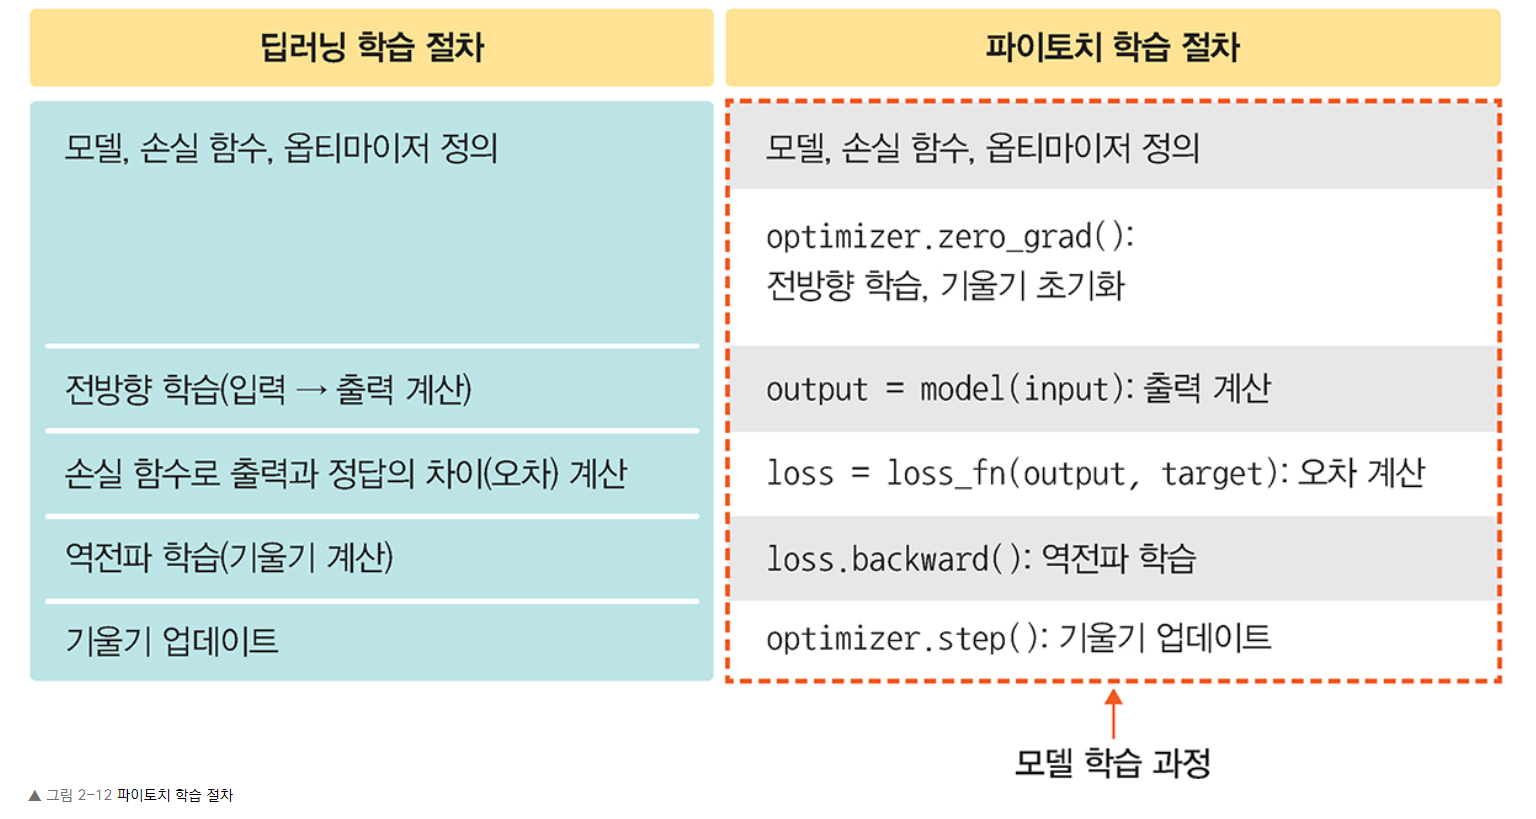

```
from torch.optim import optimizer
# 모델을 훈련시키는 예시 코드
for epoch in range(100):
  yhat = model(x_train)
  loss = criterion(yhat, y_train)
  optimizer.zero_grad()    # 오차가 중첩적으로 쌓이지 않도록 초기화
  loss.backward()
  optimzer.step()
```

## 1.6 모델 평가
- 모델에 대한 평가는 함수와 모듈을 이용하는 두 가지 방법이 존재

### a. 함수를 이용하여 모델을 평가하는 코드

In [ ]:
!pip install torchmetrics

In [ ]:
import torch
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target) # 모델을 평가하기 위해 torchmetrics.functional.accuracy 이용
acc

tensor(0.1000)

### b. 모듈을 이용하여 모델을 평가

In [ ]:
import torch
import torchmetrics

metrics = torchmetrics.Accuracy() # 모델 평가(정확도) 초기화

n_batches = 10
for i in range(n_batches):
  preds = torch.randn(10, 5).softmax(dim=-1)
  target = torch.randint(5, (10,))

  acc = metrics(preds, target)
  print(f'Accuracy on batch {i}: {acc}')  # 현재 배치에서의 모델 정확도

acc = metrics.compute()
print(f"Accuracy on all data: {acc}")     # 모든 배치에서 모델 평가(정확도)

Accuracy on batch 0: 0.0
Accuracy on batch 1: 0.0
Accuracy on batch 2: 0.10000000149011612
Accuracy on batch 3: 0.30000001192092896
Accuracy on batch 4: 0.30000001192092896
Accuracy on batch 5: 0.30000001192092896
Accuracy on batch 6: 0.20000000298023224
Accuracy on batch 7: 0.10000000149011612
Accuracy on batch 8: 0.10000000149011612
Accuracy on batch 9: 0.0
Accuracy on all data: 0.14000000059604645


## 1.7 훈련과정 모니터링

파이토치에서 텐서보드를 사용하는 방법은 다음과 같다.
1. 텐서보드를 설정(set up)
2. 텐서보드에 기록(write)
3. 텐서보드를 사용하여 모델 구조를 살펴 봄

```
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('./chap02/tensorboard') # 모니터링에 필요한 값들이 저장될 위치

for epoch in range(num_epochs):
  model.train()  # 학습 모드로 전환(dropout=True)
  batch_loss = 0.0

for i, (x, y) in enumerate(dataloader):
  x, y = x.to(device).float(), y.to(device).float()
  outputs = model(x)
  loss = criterion(outpus, y)
  writer.add_scalar('Loss', loss, epoch)   # 스칼라 값(오차)을 기록
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

writer.close()   # SummaryWriter가 더이상 필요하지 않으면 close() 메소드 호출
```
다음 명령을 입력하면 텐서보드를 실행할 수 있음
```
> tensorboard --logdir=./chap02/tensorboard --port=6006
```
마지막으로 웹 브라우저에서 https://locallhost:6006 을 입력하면 웹페이지가 열림

**model.train()  &  model.eval()**

- `model.train()`: 훈련 데이터셋에 사용하며 모델 훈련이 진행될 것임을 알림. 이때 드롭아웃(dropout)이 활성화
- `model.eval()`: 모델을 평가할 때는 모든 노드를 사용하겠다는 의미로 검증과 테스트 데이터셋에 적용

이 둘을 적절히 선언해야 모델의 정확도가 높아질 수 있다.

```
model.eval()   # 검증 모드로 전환(dropout=False)
with torch.no_grad():
  valid_loss= 0

  for x, y in valid_dataloader;
    outputs = model(x)
    loss = F.cross_entropy(outputs, y.long().squeeze())
    valid_loss += float(loss)
    y_hat += [outputs]

valid_loss = valid_loss / len(valid_loader)
```

`model.eval()`에서 `with torch.no_grad()`를 사용하는 이유:  
검증(혹은 테스트) 과정에서는 역전파가 필요하지 않기 때문에 기울기 값을 저장하지 않아도 됨. 이를 통해 기울기 값을 저장하고 기록하는 데 필요한 메모리와 연산 시간을 줄일 수 있다.

# 실습

In [ ]:
!pip install --upgrade matplotlib --use-feature=2020-resolver
!pip install --upgrade seaborn --use-feature=2020-resolver
!pip install --upgrade scikit-learn --use-feature=2020-resolver

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080289/main/chap02/data/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


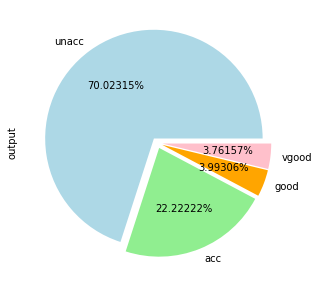

In [ ]:
# 예제 데이터셋 분포
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams['figure.figsize'] = fig_size

dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', 
                                   colors=['lightblue', 'lightgreen', 'orange', 'pink'],
                                   explode=(0.05, 0.05,0.05, 0.05));

In [ ]:
# 데이터 형태를 categorical로 변환
categorical_columns = ['price', 'maint', 'doors','persons','lug_capacity','safety']

for category in categorical_columns:
  dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety],1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [ ]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [ ]:
# 레이블로 사용할 칼럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()   # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [ ]:
# 범주형 컬럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2))for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [ ]:
# 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)  # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

# 데이터셋 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))

print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [ ]:
from torch.nn.modules.container import Sequential
# 모델의 네트워크 생성
class Model(nn.Module):
  def __init__(self, embedding_size, output_size, layers, p=0.4):
    ''' __init__()은 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사용하며,
    객체가 생성될 때 자동으로 호출

    매개변수:
      embedding_size: 범주형 컬럼의 임베딩 크기
      output_size: 출력층의 크기
      layers: 모든 계층에 대한 목록
      p: 드랍아웃(기본값은 0.5)
    '''
    super().__init__()
    self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in embedding_size])
    self.embedding_dropout = nn.Dropout(p)

    all_layers = []
    num_categorical_cols = sum((nf for ni, nf in embedding_size))
    input_size = num_categorical_cols     # 입력층의 크기를 찾기 위해 범주형 컬럼 개수를 input_size 변수에 저장

    for i in layers:  # 모델의 네트워크 계층을 구축하기 위해 for 문을 이용하여 각 계층에 all_layers 목록에 추가
      all_layers.append(nn.Linear(input_size, i))
      all_layers.append(nn.ReLU(inplace=True))
      all_layers.append(nn.BatchNorm1d(i))
      all_layers.append(nn.Dropout(p))
      input_size= i

    all_layers.append(nn.Linear(layers[-1], output_size))
    # 신경망의 모든 계층이 순차적으로 실행되도록 모든 계층에 대한 목록(all_layers)을 nn.Sequential 클래스로 전달
    self.layers = nn.Sequential(*all_layers)  

  def forward(self, x_categorical):
    embeddings = [ ]
    for i,e in enumerate(self.all_embeddings):
      embeddings.append(e(x_categorical[:,i]))
    x = torch.cat(embeddings, 1)
    x = self.embedding_dropout(x)
    x = self.layers(x)

    return x

In [ ]:
all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in categorical_embedding_sizes])
print(all_embeddings)

num_categorical_cols = sum((nf for ni, nf in categorical_embedding_sizes))
print(num_categorical_cols)

ModuleList(
  (0): Embedding(4, 2)
  (1): Embedding(4, 2)
  (2): Embedding(4, 2)
  (3): Embedding(3, 2)
  (4): Embedding(3, 2)
  (5): Embedding(3, 2)
)
12


In [ ]:
# Model 클래스의 객체 생성
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [ ]:
# 모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# CPU/GPU 사용 지정
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [ ]:
# 모델 학습
epochs = 500
aggregated_loss = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

for i in range(epochs):   # for 문은 500회 반복되며, 각 반복마다 손실 함수가 오차를 계산
  i += 1
  y_pred = model(categorical_train_data).to(device)
  single_loss = loss_function(y_pred, train_outputs)
  aggregated_loss.append(single_loss)

  if i%25 == 1:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

  optimizer.zero_grad()
  single_loss.backward()   # 가중치를 업데이트하기 위해 손실 함수의 backward() 메서드 호출
  optimizer.step()         # 옵티마이저 함수의 step() 메서드를 이용하여 기울기 업데이트

print(f"epoch: {i:3} loss: {single_loss.item(): 10.10f}")  # 오차가 25 에포크마다 출력

epoch:   1 loss: 1.57939243
epoch:  26 loss: 1.41498888
epoch:  51 loss: 1.31627035
epoch:  76 loss: 1.20372295
epoch: 101 loss: 1.04915464
epoch: 126 loss: 0.93330920
epoch: 151 loss: 0.81576544
epoch: 176 loss: 0.77143973
epoch: 201 loss: 0.69414496
epoch: 226 loss: 0.65953207
epoch: 251 loss: 0.64421892
epoch: 276 loss: 0.61795795
epoch: 301 loss: 0.61203021
epoch: 326 loss: 0.60037947
epoch: 351 loss: 0.59504145
epoch: 376 loss: 0.59214771
epoch: 401 loss: 0.59130800
epoch: 426 loss: 0.57334173
epoch: 451 loss: 0.58609301
epoch: 476 loss: 0.56415617
epoch: 500 loss:  0.5719066858


In [ ]:
# 테스트 데이터셋으로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
  y_val = model(categorical_test_data).to(device)
  loss = loss_function(y_val, test_outputs)
print(f"Loss: {loss:.8f}")

Loss: 0.56791979


In [ ]:
# 모델의 예측 확인
print(y_val[:5])

# 가장 큰 값을 갖는 인덱스 확인
y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])

tensor([[ 1.7140,  0.7929, -2.4825, -2.4668],
        [ 2.7824,  1.5428, -3.6709, -3.6006],
        [ 1.9457,  0.9857, -3.0138, -2.8476],
        [ 4.6584,  2.6502, -6.1971, -6.1229],
        [ 1.7298,  0.8721, -2.3791, -2.2561]], device='cuda:0')
[0 0 0 0 0]


In [ ]:
# 테스트 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

print(confusion_matrix(test_outputs.cpu().numpy(), y_val))
print(classification_report(test_outputs.cpu().numpy(), y_val))
print(accuracy_score(test_outputs.cpu().numpy(), y_val))
print(f1_score(test_outputs.cpu().numpy(), y_val))

[[259   0]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       1.00      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.88      0.51      0.44       345
weighted avg       0.81      0.75      0.65       345

0.7536231884057971
0.022988505747126436
